In [17]:
import sys, os

pysbf_path = "/media/Data/Home/PanStarrs/Jan/HI/augment/SBF/codes/"
sys.path.insert(0, pysbf_path)
from pysbf import *

from IPython.display import display, Markdown, clear_output
warnings.filterwarnings('ignore')

In [24]:
inFolder = './data/wfc3/'
outFolder = './output/'
configFolder = pysbf_path + 'pysbf/config/'

In [25]:
name = "u12517"

outFolder += "Outputs_"+name+'/'
logFile = outFolder+name+"_model_log.csv"

In [26]:
df_log = open_log_df(logFile)
sky_med = float(df_log.loc["initial_sky_med"].value)

df = open_log_df(logFile)
obj_uuid = df.loc['uuid'].value
objRoot = outFolder+name+'_'+obj_uuid+'/'

X0 = float(df.loc['X0'].value)
Y0 = float(df.loc['Y0'].value)

Config = {} 

Config["name"] = name
Config["inFolder"] = inFolder
Config["objRoot"] = objRoot
Config["configFolder"] = configFolder
Config["X0"] = X0
Config["Y0"] = Y0

In [27]:
## renuc factors for Sextractor
## 100 Mpc renuc = 1.5
## 20 Mpc renuc = 7


In [28]:
avoiding_r = widgets.FloatSlider(
                    value=20,
                    min=1,
                    max=200,
                    step=1,
                    description="R_aperture",
                )

print("Radius of the avoding zone [pix]")
display(avoiding_r)

Radius of the avoding zone [pix]


FloatSlider(value=20.0, description='R_aperture', max=200.0, min=1.0, step=1.0)

In [29]:
# used Dmask instead of mask1
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(model=0, 
                                       smooth=1.0, minArea=10, thresh=2.5,
                                       r_aperture = avoiding_r.value,   # [pixel] ignore objects within the aperture
                                       renuc=2, **Config) 

catal_df.head()

./output/Outputs_u12517/u12517_9f43b1726bf2/obj.000.pro


,NUMBER,X_IMAGE,Y_IMAGE,ALPHA_J2000,DELTA_J2000,MAG_AUTO,MAGERR_AUTO,A_IMAGE,B_IMAGE,THETA_IMAGE,...,MAGERR_APER_1,MAGERR_APER_2,MAGERR_APER_3,MAGERR_APER_4,MAGERR_APER_5,MAG_ISO,MAGERR_ISO,MAG_ISOCOR,MAGERR_ISOCOR,rc
0,1,289.858,94.597,349.951975,43.962527,-14.4222,0.0018,1.795,1.643,77.2,...,0.0013,0.0,-93163432216623054848.0000,0.0,0.0,-14.4627,0.0022,-14.4795,0.0025,544.241387
1,2,866.618,37.736,349.972744,43.978395,-12.4509,0.0190,4.578,1.676,-87.3,...,0.0134,0.0,-93163432216623054848.0000,0.0,0.0,-12.2408,0.0127,-12.4227,0.0216,604.062241
2,3,17.345,37.746,349.939545,43.957126,-12.8564,0.0282,4.980,3.466,89.7,...,0.0470,0.0,-93163432216623054848.0000,0.0,0.0,-12.1968,0.0176,-12.8826,0.0305,760.461800
3,4,972.826,20.641,349.976362,43.981483,-13.2620,0.0062,3.152,1.850,-88.3,...,0.0043,0.0,-93163432216623054848.0000,0.0,0.0,-13.2610,0.0056,-13.3207,0.0078,676.696981
4,5,491.421,22.989,349.957612,43.969369,-11.0984,0.0362,2.602,1.067,64.0,...,0.0317,0.0,-93163432216623054848.0000,0.0,0.0,-10.8305,0.0264,-11.0683,0.0471,544.980902


In [30]:
def ds9_scale_image(reg_file='./ds9.reg'):
    
    os.system("xpaset -p ds9 regions delete all &")
    os.system("xpaset -p ds9 regions "+reg_file+" &")

    # http://ds9.si.edu/doc/ref/xpa.html
    os.system("xpaset -p ds9 regions "+reg_file+" &")
    os.system("xpaset -p ds9 cmap value 7.9 0.47 &")

    # set image scale
    os.system("xpaset -p ds9 scale log &")
    os.system("xpaset -p ds9 scale limits -4100 200000 &")

## Ds9

Open ds9 and wait for its window to fully appear

In [31]:
print("sex_mask: ", sex_mask)
print("sex_masked: ", sex_masked)
print("residual: ", residual)
print("sex_objname: ", sex_objname)

_ = CMD_button("ds9 "+sex_mask+" &", "[DS9] sex_mask")
_ = CMD_button("ds9 "+sex_masked+" &", "[DS9] sex_masked")
_ = CMD_button("ds9 "+residual+" &", "[DS9] residual")
_ = CMD_button("ds9 "+sex_objname+" &", "[DS9] sex_objname")

sex_mask:  ./output/Outputs_u12517/u12517_9f43b1726bf2//mask_se.000
sex_masked:  ./output/Outputs_u12517/u12517_9f43b1726bf2//masked_se.000
residual:  ./output/Outputs_u12517/u12517_9f43b1726bf2//resid.000
sex_objname:  ./output/Outputs_u12517/u12517_9f43b1726bf2//objCheck.000


### Regions Guid

- green: extended opbject
- red: star, point source
- cyan: ignored
- yellow: avoding zone

In [32]:
print("Radius of the avoding zone [pix]")
display(avoiding_r)

Radius of the avoding zone [pix]


FloatSlider(value=20.0, description='R_aperture', max=200.0, min=1.0, step=1.0)

In [39]:
catalName, catal_df, sex_objname, sex_mask, sex_masked, residual = SExtract(
                                       model=0,
                                       smooth=1.0, minArea=5, thresh=3.0,
                                       r_aperture = avoiding_r.value,   # [pixel] ignore objects within the aperture
                                       renuc=1, **Config) 

make_se_lkn(catal_df, model=0, star_f=0.8, r_aperture=avoiding_r.value, **Config)


./output/Outputs_u12517/u12517_9f43b1726bf2/obj.000.pro
wrote:  ./output/Outputs_u12517/u12517_9f43b1726bf2/se_lknj.000
# of GCs:  165
# of galaxies:  625


- **yellow**: ignore
- **cyan**: point sources
- **green**: galaxies, extended objects
- **red**: ignore

## Deleting / Loading Regions

In [34]:
reg_button = ds9_region_display(reg_file="./ds9.reg")

In [35]:
## create the maks of the extended objects + Dmask --> dophot

## Visualizations

Text(0.5, 1.0, '[zoom 5] Sex. objects masked')

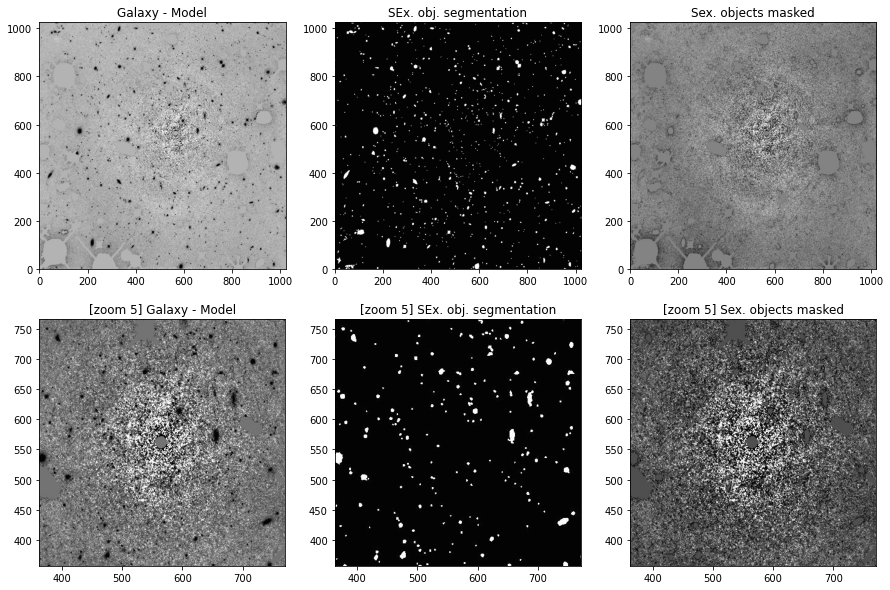

In [36]:
fig, AX = plt.subplots(2,3, figsize=(15,10))


ax1 = tv(residual, ax=AX[0][0])
ax2 = tv(sex_objname, ax=AX[0][1])
ax3 = tv(sex_masked, ax=AX[0][2], options='')

ax1.set_title("Galaxy - Model")
ax2.set_title("SEx. obj. segmentation")
ax3.set_title("Sex. objects masked")

zoom = 5
ax1 = tv(sex_mask, ax=AX[1][0], XY=[X0,Y0], zoom=zoom, options='sqrt')
ax2 = tv(sex_objname, ax=AX[1][1], XY=[X0,Y0], zoom=zoom)
ax3 = tv(sex_masked, ax=AX[1][2], XY=[X0,Y0], zoom=zoom, options='sqrt')

ax1.set_title("[zoom {}] ".format(zoom)+"Galaxy - Model")
ax2.set_title("[zoom {}] ".format(zoom)+"SEx. obj. segmentation")
ax3.set_title("[zoom {}] ".format(zoom)+"Sex. objects masked")

In [37]:
print("sex_mask: ", sex_mask)
print("sex_masked: ", sex_masked)
print("residual: ", residual)
print("sex_objname: ", sex_objname)

_ = CMD_button("ds9 "+sex_mask+" &", "[DS9] sex_mask")
_ = CMD_button("ds9 "+sex_masked+" &", "[DS9] sex_masked")
_ = CMD_button("ds9 "+residual+" &", "[DS9] residual")
_ = CMD_button("ds9 "+sex_objname+" &", "[DS9] sex_objname")

sex_mask:  ./output/Outputs_u12517/u12517_9f43b1726bf2//mask_se.000
sex_masked:  ./output/Outputs_u12517/u12517_9f43b1726bf2//masked_se.000
residual:  ./output/Outputs_u12517/u12517_9f43b1726bf2//resid.000
sex_objname:  ./output/Outputs_u12517/u12517_9f43b1726bf2//objCheck.000


In [38]:
display(reg_button.button)

Button(description='Regions On/Off', style=ButtonStyle())